In [126]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, util
from sklearn.decomposition import NMF

In [98]:
# Download and load the two 2D images
image1_url = 'https://people.ast.cam.ac.uk/~vasily/data/catalogues/grayscale_patti.jpg'
image2_url = 'https://people.ast.cam.ac.uk/~vasily/data/catalogues/grayscale_einstein.jpg'

image1 = io.imread(image1_url, as_gray=True)
image2 = io.imread(image2_url, as_gray=True)

In [99]:
# Trim the images to the same size
min_shape = (min(image1.shape[0], image2.shape[0]), min(image1.shape[1], image2.shape[1]))
image1 = image1[:min_shape[0], :min_shape[1]]
image2 = image2[:min_shape[0], :min_shape[1]]


In [100]:
# Rescale the images between the 5th and 95th percentiles
p5_image1, p95_image1 = np.percentile(image1, 5), np.percentile(image1, 95)
p5_image2, p95_image2 = np.percentile(image2, 5), np.percentile(image2, 95)

image1_rescaled = (image1-p5_image1)/(p95_image1-p5_image1)
image2_rescaled = (image2-p5_image2)/(p95_image2-p5_image2)

image1_rescaled = np.clip(image1, 0, 1)
image2_rescaled = np.clip(image2, 0, 1)


In [200]:
# Create a mock dataset of different mixtures of the two images
n_samples = 100
mixing_coefficients = np.random.uniform(0.3, 0.7, size=(n_samples, 2))
mock_dataset = mixing_coefficients[:, 0][:, np.newaxis] *image1_rescaled.flatten() + mixing_coefficients[:, 1][:, np.newaxis] * image2_rescaled.flatten()
mock_dataset = mock_dataset.reshape(n_samples, min_shape[0], min_shape[1])


In [201]:
# Add noise to the mock dataset
for i in range(n_samples):
    noise = np.random.uniform(-0.3, 0.3, min_shape)
    mock_dataset[i] = np.clip(mock_dataset[i]+noise,0,1)

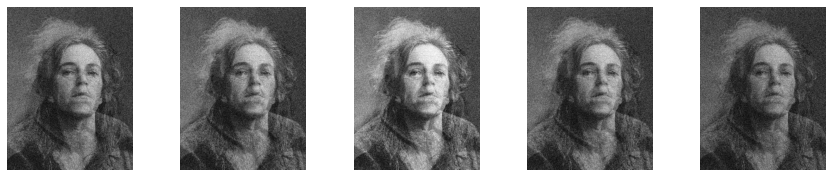

In [210]:
# Assuming mock_dataset is a 3D array of shape (n_samples, height, width)
n_samples, height, width = mock_dataset.shape

# Select 5 random indices
indices = np.random.choice(n_samples, 5, replace=False)

# Display the selected images side by side
plt.figure(figsize=(15, 3))
for i, idx in enumerate(indices):
    plt.subplot(1, 5, i + 1)
    plt.imshow(mock_dataset[idx], cmap='gray')
    plt.axis('off')
plt.show()

In [212]:
# Run non-negative matrix factorization to find the original images
nmf_model = NMF(n_components=2, init='nndsvdar', random_state=0, solver = 'cd', max_iter=200)
W = nmf_model.fit_transform(mock_dataset.reshape(n_samples, -1))
H = nmf_model.components_

/Users/vasily/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 5000 reached. Increase it to improve convergence.
  warnings.warn(


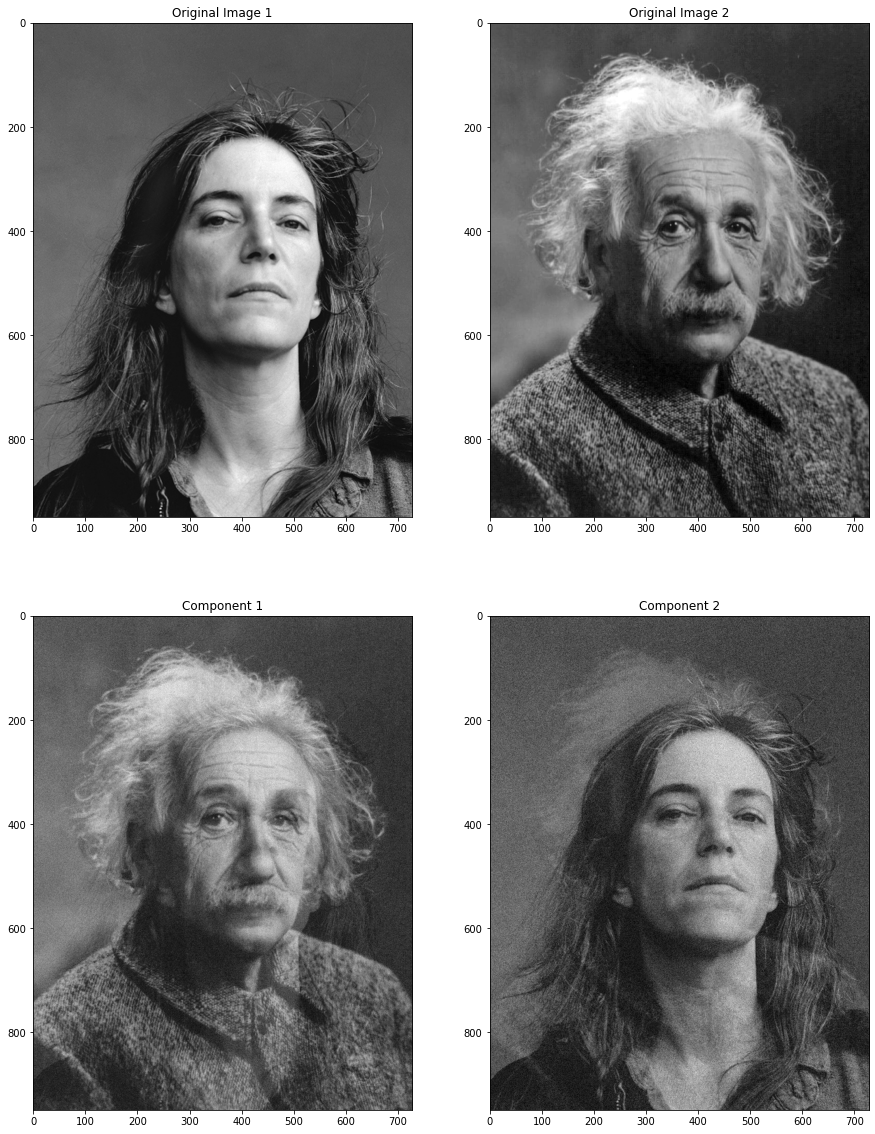

In [213]:
# Plot the original images and the reconstructed images
plt.figure(figsize=(15, 20))

plt.subplot(2, 2, 1)
plt.imshow(image1, cmap='gray')
plt.title('Original Image 1')

plt.subplot(2, 2, 2)
plt.imshow(image2, cmap='gray')
plt.title('Original Image 2')

plt.subplot(2, 2, 3)
plt.imshow(H[0].reshape(min_shape), cmap='gray')
plt.title('Component 1')

plt.subplot(2, 2, 4)
plt.imshow(H[1].reshape(min_shape), cmap='gray')
plt.title('Component 2')

plt.subplots_adjust(wspace=0.2, hspace=0.2)

plt.show()

(100, 690872)